# Screening Test:

# 1. Introduction: 

This notebook is a part of screening test. 
The objective is to ptogrammatically process a machine learning workflow based on a given configuration. 

The workflow includes:
1. Parsing JSON file(algoparams_from_ui) to extract necessary information such as target variables, features, model settings, hyperparameters.

2. Handling the dataset, including imputation of missing values, feature engineering, and feature reduction.

3. Building machine learning models using the specifications mentioned in the JSON, and selecting appropriate models for regression tasks.

4. Applying hyperparameter tuning using GridSearchCV to optimize model performance.

5. Evaluating models using standard regression metrics such as Mean Absolute Error(MAE), Root Mean Squared Error (RMSE), and R-squared.

6. Finally, implementung an interactive GUI for easy input and prediciton.


The notebook is structured to be generic, meaning it can handle any configuration that follos the provided JSON format, making it adaptable for different datasets and requirements. This ensures a versatile solution capable of managing various machine learning tasks end-to-end.

# 2. Loading dataset and Parsing the JSON configuration:

In [1]:
json_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"
with open(json_file_path, 'r', encoding='utf-8') as file:
    json_content = file.read()
    print("File content:")
    print(json_content)

File content:
{\rtf1\adeflang1025\ansi\ansicpg1252\uc1\adeff31507\deff0\stshfdbch31506\stshfloch31506\stshfhich31506\stshfbi31507\deflang1033\deflangfe1033\themelang1033\themelangfe0\themelangcs0{\fonttbl{\f2\fbidi \fmodern\fcharset0\fprq1{\*\panose 02070309020205020404}Courier New;}{\f34\fbidi \froman\fcharset0\fprq2{\*\panose 02040503050406030204}Cambria Math;}
{\f37\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0502020204030204}Calibri;}{\f43\fbidi \fmodern\fcharset0\fprq1{\*\panose 020b0609020204030204}Consolas;}{\flomajor\f31500\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}
{\fdbmajor\f31501\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\fhimajor\f31502\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0302020204030204}Calibri Light;}
{\fbimajor\f31503\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\flominor\f31504\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}

In [105]:
pip install striprtf

In [3]:
from striprtf.striprtf import rtf_to_text
import json

In [6]:
def extract_json_from_rtf(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        rtf_content = file.read()
        
    plain_text = rtf_to_text(rtf_content)
    
    try:
        start_idx = plain_text.find('{')
        end_idx = plain_text.rfind('}')
        
        if start_idx == -1 or end_idx == -1 or start_idx >= end_idx:
            raise ValueError("Could not find JSON-like content.")
            
        json_candidate = plain_text[start_idx:end_idx +1]
        
        json_data = json.loads(json_candidate)
        return json_data
    
    except (ValueError, json.JSONDecodeError) as e:
        print(f"Error:{e}")
        return None
    
json_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"
json_data = extract_json_from_rtf(json_file_path)


if json_data:
    print(json.dumps(json_data, indent=4))
else:
    print("Failed to extract valid JSON content.")

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {
        "session_info": {
            "project_id": "1",
            "experiment_id": "kkkk-11",
            "dataset": "iris_modified.csv",
            "session_name": "test",
            "session_description": "test"
        },
        "target": {
            "prediction_type": "Regression",
            "target": "petal_width",
            "type": "regression",
            "partitioning": true
        },
        "train": {
            "policy": "Split the dataset",
            "time_variable": "sepal_length",
            "sampling_method": "No sampling(whole data)",
            "split": "Randomly",
            "k_fold": false,
            "train_ratio": 0,
            "random_seed": 0
        },
        "metrics": {
            "optomize_model_hyperparameters_for": "AUC",
            "optimize_threshold_for": "F1 Score",
            "compute_lift_at": 0,
            "cost_matrix_gain_for_true_

In [7]:
pip install pypandoc

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pywin32

Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pyrtf-ng

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyrtf-ng (from versions: none)
ERROR: No matching distribution found for pyrtf-ng


In [10]:
pip install striprtf

Note: you may need to restart the kernel to use updated packages.


In [11]:
from striprtf.striprtf import rtf_to_text
import json
import re

In [14]:
def extract_json_from_rtf_with_striprtf(file_path):
    try:
        with open (file_path, 'r', encoding='utf-8') as file:
            rtf_content = file.read()
            
        plain_text = rtf_to_text(rtf_content)
        
        json_pattern = re.compile(r'\{.*\}', re.DOTALL)
        json_match = json_pattern.search(plain_text)
        
        if json_match:
            json_str = json.match.group(0)
            
            json_data = json.loads(json_str)
            return json_data
        else:
            raise ValueError("Could not find JSON-like content.")
            
    except (ValueError, json.JSONDecodeError, Exception) as e:
        print(f"Error: {e}")
        return None
    
rtf_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"
json_data = extract_json_from_rtf_with_striprtf(rtf_file_path)

if json_data:
    print(json.dumps(json_data, indent=4))
else:
    print("Failed to extract valid JSON content.")

Error: module 'json' has no attribute 'match'
Failed to extract valid JSON content.


In [16]:
from striprtf.striprtf import rtf_to_text
import json
import re

def extract_json_from_rtf_with_striprtf(file_path):
    try:
        
        with open(file_path, 'r', encoding='utf-8') as file:
            rtf_content = file.read()

       
        plain_text = rtf_to_text(rtf_content)

    
        json_pattern = re.compile(r'\{.*\}', re.DOTALL)
        json_match = json_pattern.search(plain_text)

        if json_match:
            json_str = json_match.group(0)

      
            json_data = json.loads(json_str)
            return json_data
        else:
            raise ValueError("Could not find JSON-like content.")

    except (ValueError, json.JSONDecodeError, Exception) as e:
        print(f"Error: {e}")
        return None


rtf_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"
json_data = extract_json_from_rtf_with_striprtf(rtf_file_path)


if json_data:
    print(json.dumps(json_data, indent=4))
else:
    print("Failed to extract valid JSON content.")

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {
        "session_info": {
            "project_id": "1",
            "experiment_id": "kkkk-11",
            "dataset": "iris_modified.csv",
            "session_name": "test",
            "session_description": "test"
        },
        "target": {
            "prediction_type": "Regression",
            "target": "petal_width",
            "type": "regression",
            "partitioning": true
        },
        "train": {
            "policy": "Split the dataset",
            "time_variable": "sepal_length",
            "sampling_method": "No sampling(whole data)",
            "split": "Randomly",
            "k_fold": false,
            "train_ratio": 0,
            "random_seed": 0
        },
        "metrics": {
            "optomize_model_hyperparameters_for": "AUC",
            "optimize_threshold_for": "F1 Score",
            "compute_lift_at": 0,
            "cost_matrix_gain_for_true_

In [17]:
import json

if json_data:
    print(json.dumps(json_data, indent=4))

{
    "session_name": "test",
    "session_description": "test",
    "design_state_data": {
        "session_info": {
            "project_id": "1",
            "experiment_id": "kkkk-11",
            "dataset": "iris_modified.csv",
            "session_name": "test",
            "session_description": "test"
        },
        "target": {
            "prediction_type": "Regression",
            "target": "petal_width",
            "type": "regression",
            "partitioning": true
        },
        "train": {
            "policy": "Split the dataset",
            "time_variable": "sepal_length",
            "sampling_method": "No sampling(whole data)",
            "split": "Randomly",
            "k_fold": false,
            "train_ratio": 0,
            "random_seed": 0
        },
        "metrics": {
            "optomize_model_hyperparameters_for": "AUC",
            "optimize_threshold_for": "F1 Score",
            "compute_lift_at": 0,
            "cost_matrix_gain_for_true_

In [106]:
{
    "target_variable": "petal_width",
    "prediction_type": "regression",
    "features": ["sepal_length", "sepal_width", "petal_length"],
    "imputation": {
        "method": "mean"
    },
    "feature_reduction": {
        "type": "pca"
    }
}


{'target_variable': 'petal_width',
 'prediction_type': 'regression',
 'features': ['sepal_length', 'sepal_width', 'petal_length'],
 'imputation': {'method': 'mean'},
 'feature_reduction': {'type': 'pca'}}

# 3. Feature Engineering and Preparing the Model:
Applying hyperparameter tuning using GridSearchCV to optimize model performance.

In [18]:
target_config = json_data.get("design_state_data", {}).get("target", {})
prediction_type = target_config.get("prediction_type", "Regression")
target_variable = target_config.get("target", "petal_width")

print(f"Prediction Type: {prediction_type}")
print(f"Target Variable: {target_variable}")

train_config = json_data.get("design_state_data", {}).get("train", {})
train_ratio = train_config.get("train_ratio", 0.8)
split_method = train_config.get("split", "Randomly")
random_seed = train_config.get("random_seed", 42)

print(f"Training Split: {train_ratio}")
print(f"Split Method: {split_method}")
print(f"Random Seed: {random_seed}")

Prediction Type: Regression
Target Variable: petal_width
Training Split: 0
Split Method: Randomly
Random Seed: 0


In [19]:
import pandas as pd
dataset_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv"
df = pd.read_csv(dataset_path)

feature_handling = json_data.get("design_state_data", {}).get("feature_handling", {})

for feature_name, feature_config in feature_handling.items():
    if feature_name in df.columns:
        missing_value_strategy = feature_config.get("feature_details", {}).get("missing_values", "None")
        impute_value = feature_config.get("feature_details",{}).get("impute_value", 0)
        
        if missing_value_strategy == "Impute":
            df[feature_name].fillna(impute_value, inplace=True)
            
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

In [22]:
x = df.drop(columns=['petal_width'])
y= df['petal_width']

encoder = LabelEncoder()
x['species'] = encoder.fit_transform(x['species'])

x_train,x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=42)

model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.03420206563538755


In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
dataset_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv"
df = pd.read_csv(dataset_path)

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [26]:
data = {
    "sepal_length": [5.1,4.9, 4.7, 4.6, 5.0],
    "sepal_width": [3.5, 3.0, 3.2, 3.1, 3.6],
    "petal_length": [1.4, 1.4, 1.3, 1.5, 1.4],
    "petal_width": [0.2, 0.2, 0.2, 0.2,0.2],
    "species": ["Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa", "Iris-setosa"],
}

df = pd.DataFrame(data)

label_encoder = LabelEncoder()
df['species_encoded'] = label_encoder.fit_transform(df['species'])

x = df[['sepal_length', 'sepal_width', 'petal_length', 'species_encoded']]
y = df['petal_width']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Sqaured Error: {mse}")

Mean Sqaured Error: 6.933347799794049e-33


In [28]:
iris_data = pd.read_csv(r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\iris.csv")

label_encoder = LabelEncoder()
iris_data['species'] = label_encoder.fit_transform(iris_data['species'])

x = iris_data.drop(columns=['petal_width'])
y = iris_data['petal_width']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(random_state=42)


param_grid = {
    'n_estimators': [50,100,150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.03516426309774976


In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

R-squared Score: 0.9446803181527823
MeanAbsolute Error: 0.1513174803607698


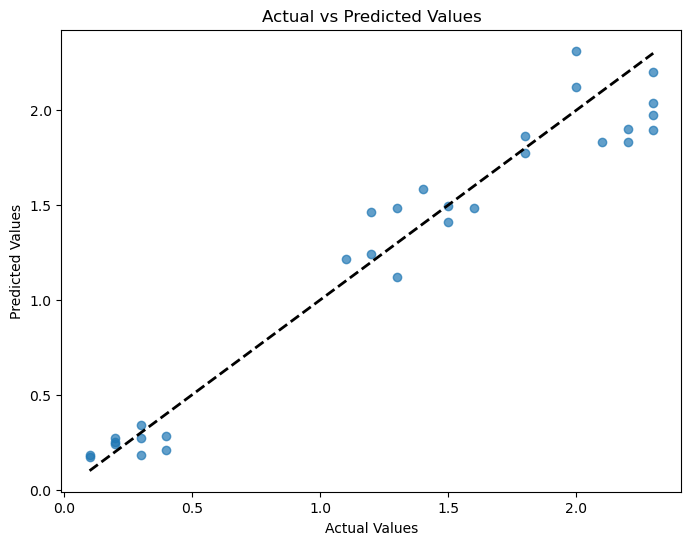

In [30]:
y_pred = best_rf.predict(x_test)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")

mae = mean_absolute_error(y_test, y_pred)
print(f"MeanAbsolute Error: {mae}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

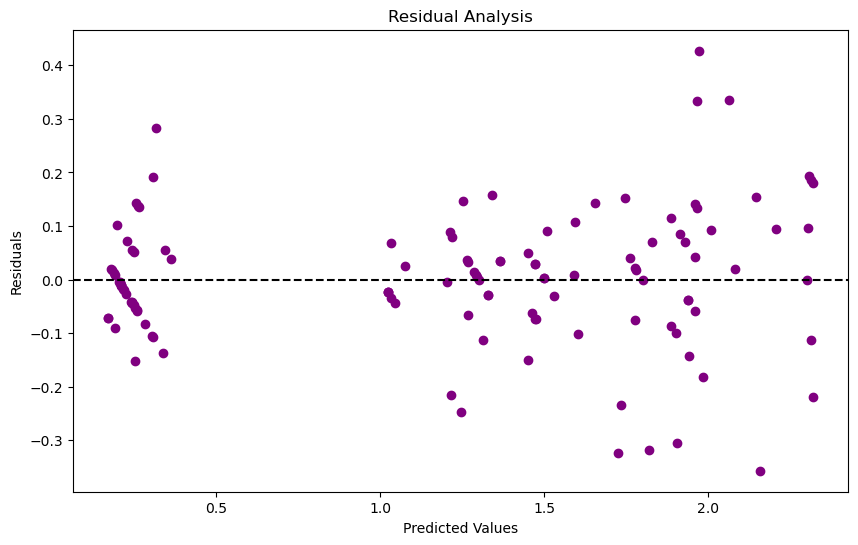

In [31]:
y_train_pred = best_rf.predict(x_train)

residuals = y_train - y_train_pred

plt.figure(figsize=(10,6))
plt.scatter(y_train_pred, residuals, color='purple')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Analysis')
plt.show()

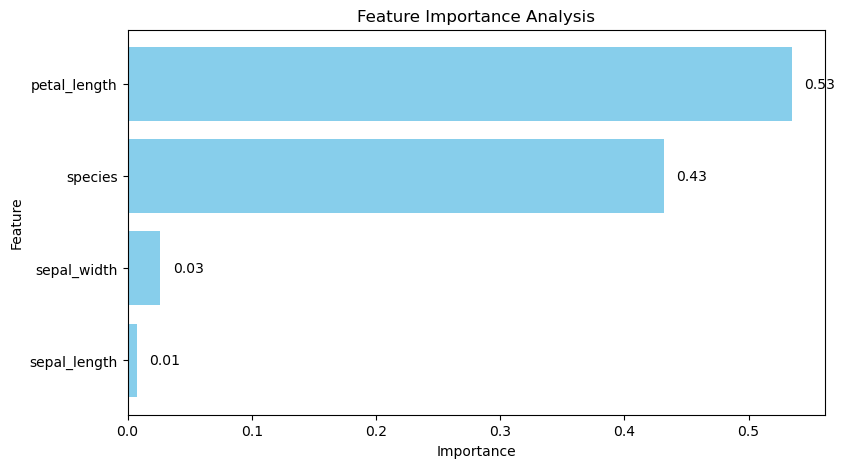

In [34]:
feature_importances = best_rf.feature_importances_
features = x_train.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(9,5))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.gca().invert_yaxis()

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center')
    
plt.show()

In [36]:
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RepeatedKFold, RandomizedSearchCV

In [43]:
df = pd.read_csv("C:/Users/hp/Downloads/DS_Assignment - internship/Screening Test - DS/iris.csv")
df = df.drop(columns=['species'])

x = df.drop(columns=['petal_width'])
y = df['petal_width']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scalar', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', RandomForestRegressor(random_state=42))
])

param_distributions = {
    'model__n_estimators': [100, 200, 300, 400],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}

cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)
random_search = RandomizedSearchCV(pipeline, param_distributions, n_iter=20, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(x_train, y_train)

best_model = random_search.best_estimator_
y_pred = best_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared Score: {r2}")

feature_importances = best_model.named_steps['model'].feature_importances_
features = x.columns

plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=features, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance Analysis')
plt.show()

Mean Squared Error: 0.043257637606528405
Mean Absolute Error: 0.15920364858581962
R-squared Score: 0.9319479909701698


ValueError: Grouper and axis must be same length

<Figure size 1000x600 with 0 Axes>

In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [45]:
def create_feature_handling_pipeline(features, imputation_method):
    if imputation_method == "mean":
        imputer = SimpleImputer(strategy="mean")
    elif imputation_method == "median":
        imputer = SimpleImputer(strategy="median")
    elif imputation_method == "most_frequent":
        imputer = SimpleImputer(strategy="most_frequent")
    else:
        raise ValueError("Unsupported imputation method")
        
    feature_handling = ColumnTransformer(
        transformers=[
            ('imputer', imputer, features)
        ],
        remainder='passthrough'
    )
    return feature_handling

In [47]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor
from sklearn.base import BaseEstimator, TransformerMixin

In [49]:
class FeatreReducer(BaseEstimator, TransformerMixin):
    def __init__(self, reduction_type, target_column):
        self.reduction_type = reduction_type
        self.target_column = target_column
        
    def fir(self, x, y=None):
        if self.reduction_type == "tree_based":
            self.selector = SelectFromModel(RandomForestRegressor(n_estimators=100)).fit(x,y)
        elif sef.reduction_type == "pca":
            self.pca = PCA(n_components=min(x.shape[1], 5)).fit(x)
        return self
    
    def transform(self, x):
        if self.reduction_type == "tree_based":
            return self.selector.transform(x)
        elif self.reduction_type == "pca":
            return self.pca.transform(x)
        return x

def create_feature_reduction_pipeline(reduction_type, target_column):
    return FeatureReducer(reduction_type=reduction_type, target_column=target_column)

# 4. Creating Pipeline:

In [50]:
def create_model_pipeline(prediction_type):
    if prediction_type == "regression":
        rf = RandomForestRegressor(random_state=0)
        param_grid = {
            'n_estimators': [50, 100, 150],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    else:
        raise ValueError("Unsupported prediction type")
        
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    return grid_search

In [51]:
json_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"

with open(json_file_path, 'r') as file:
    try:
        config = json.load(file)
    except json.JSONDecodeError as e:
        print(f"Error parsing JSON file: {e}")

Error parsing JSON file: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)


In [53]:
json_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"

try:
    with open(json_file_path, 'r') as file:
        json_content = file.read().strip()
        if not json_content:
            raise ValueError("The JSON file is empty.")
            
        print("JSON File Content:\n", json_content)
        
        config = json.loads(json_content)
        
except json.JSONDecodeError as e:
    print(f"Error parsing JSON fie: {e}")
except FileNotFoundError:
    print("The specified JSON file could not be found.")
except ValueError as e:
    print(e)

JSON File Content:
 {\rtf1\adeflang1025\ansi\ansicpg1252\uc1\adeff31507\deff0\stshfdbch31506\stshfloch31506\stshfhich31506\stshfbi31507\deflang1033\deflangfe1033\themelang1033\themelangfe0\themelangcs0{\fonttbl{\f2\fbidi \fmodern\fcharset0\fprq1{\*\panose 02070309020205020404}Courier New;}{\f34\fbidi \froman\fcharset0\fprq2{\*\panose 02040503050406030204}Cambria Math;}
{\f37\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0502020204030204}Calibri;}{\f43\fbidi \fmodern\fcharset0\fprq1{\*\panose 020b0609020204030204}Consolas;}{\flomajor\f31500\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}
{\fdbmajor\f31501\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\fhimajor\f31502\fbidi \fswiss\fcharset0\fprq2{\*\panose 020f0302020204030204}Calibri Light;}
{\fbimajor\f31503\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New Roman;}{\flominor\f31504\fbidi \froman\fcharset0\fprq2{\*\panose 02020603050405020304}Times New R

In [55]:
from striprtf.striprtf import rtf_to_text

json_file_path = r"C:\Users\hp\Downloads\DS_Assignment - internship\Screening Test - DS\algoparams_from_ui.json.rtf"

try:
    with open(json_file_path, 'r') as file:
        rtf_content = file.read()
        json_content = rtf_to_text(rtf_content)
        
        config = json.loads(json_content)
        print("JSON Loaded Successfully.")
        
except json.JSONDecoderError as e:
    print(f"Error parsing JSON file: {e}")
except FileNotFoundError:
    print("The specified JSON file was not found")

JSON Loaded Successfully.


In [59]:
try:
    target = config['design_state_data']['target']['target']
    features = list(config['design_state_data']['feature_handling'].keys())
    imputation_method = config['design_state_data']['feature_handling']['petal_width']['feature_details']['missing_values']
    reduction_type = config['design_state_data']['feature_reduction']['feature_reduction-method']
    prediction_type = config['design_state_data']['target']['prediction_type']

    x = df[features]
    y = df[target]

    pipeline = create_full_pipeline(features, imputation_method, reduction_type, target, prediction_type)
    pipeline.fit(x,y)
    
    print("Pipeline fitting completed successfully.")
    
except KeyError as e:
    print(f"Missing key in JSON configuration: {e}")
except NameError as e:
    print(f"Variable not defined: {e}")


Missing key in JSON configuration: 'feature_reduction-method'


In [60]:
print(df.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')


In [61]:
df.columns = df.columns.str.strip().str.lower()
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [62]:
features = [feature.lower() for feature in features]
features

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [66]:
def create_full_pipeline(features, imputation_method, reduction_type, target, prediction_type):
    numerical_features = [feature for feature in features if df[feature].dtype in ['int64','float64']]
    categorical_features = [feature for feature in features if df[feature].dtype == 'object']
    
    numerical_transformer = SimpleImputer(strategy=imputation_method if imputation_method != "custom" else "mean")
    
    categorical_transformer = Pipeline(steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore'))
    ])
    
    preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
    
    if prediction_type == 'Regression':
        model = RandomForestRegressor()
    else:
        raise ValueError("Only regression is supported for now.")
        
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model',model)
                              ])
    return pipeline

features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
pipeline = create_full_pipeline(features, 'mean', None, 'petal_width', 'Regression')


x = df[features]
y = df['petal_width']
pipeline.fit(x,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['sepal_length',
                                                   'sepal_width',
                                                   'petal_length',
                                                   'petal_width']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encode',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('model', RandomForestRegressor())])

# 5. Model Evaluation:

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
pipeline.fit(x_train,y_train)
predictions=pipeline.predict(x_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error on test set: {mse:.2f}")

Mean Squared Error on test set: 0.00


In [69]:
print("Predictions vs Actual:")
for actual, predicted in zip(y_test[:10], predictions[:10]):
    print(f"Actual: {actual}, Predicted: {predicted}")
    

Predictions vs Actual:
Actual: 1.2, Predicted: 1.2040000000000017
Actual: 0.3, Predicted: 0.3220000000000002
Actual: 2.3, Predicted: 2.2920000000000034
Actual: 1.5, Predicted: 1.5019999999999998
Actual: 1.4, Predicted: 1.4000000000000026
Actual: 0.4, Predicted: 0.4289999999999996
Actual: 1.3, Predicted: 1.289999999999998
Actual: 2.3, Predicted: 2.3010000000000037
Actual: 1.5, Predicted: 1.5019999999999998
Actual: 1.2, Predicted: 1.1950000000000012


In [70]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(pipeline, x, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -1 * cv_scores.mean()
print(f"Mean Cross-Validation MSE: {mean_cv_mse:.2f}")

Mean Cross-Validation MSE: 0.00


In [72]:
r2 = r2_score(y_test, predictions)
print(f"R-squared on test set: {r2:.2f}")
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error on test set: {mae:.2f}")

R-squared on test set: 1.00
Mean Absolute Error on test set: 0.01


In [73]:
print(f"Variance of target variable: {y.var()}")

Variance of target variable: 0.5824143176733784


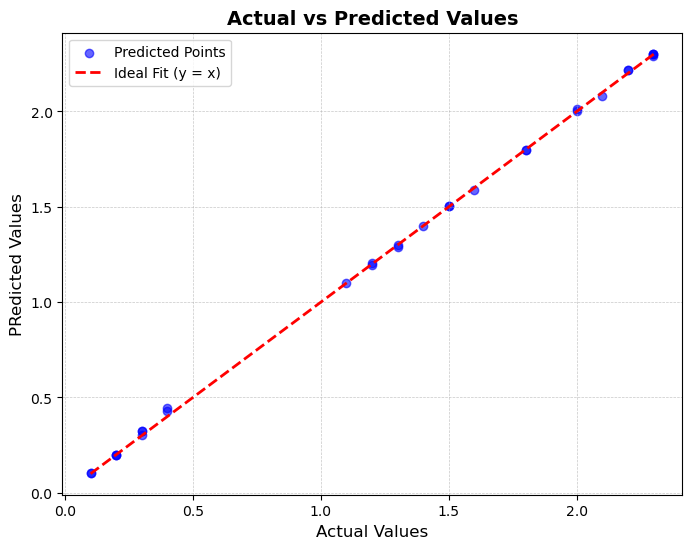

In [74]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, predictions, label="Predicted Points", color='blue', alpha=0.6)

line_start = min(y_test.min(), predictions.min())
line_end = max(y_test.max(), predictions.max())
plt.plot([line_start, line_end],[line_start, line_end], color='red', linestyle='--', linewidth=2, label='Ideal Fit (y = x)')

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)

plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("PRedicted Values", fontsize=12)
plt.title("Actual vs Predicted Values", fontsize=14,fontweight='bold')

plt.legend(loc='upper left', fontsize=10)

for i, (actual, pred) in enumerate(zip(y_test, predictions)):
    if abs(actual - pred) > 0.1:
        plt.annotate(f'{i}', (actual, pred), textcoords="offset points", xytext=(5,5), ha='center', fontsize=8, color='black')
        
plt.show()    
        
    

In [75]:
print(pipeline.named_steps)

{'preprocessor': ColumnTransformer(transformers=[('num', SimpleImputer(),
                                 ['sepal_length', 'sepal_width', 'petal_length',
                                  'petal_width']),
                                ('cat',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encode',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 [])]), 'model': RandomForestRegressor()}


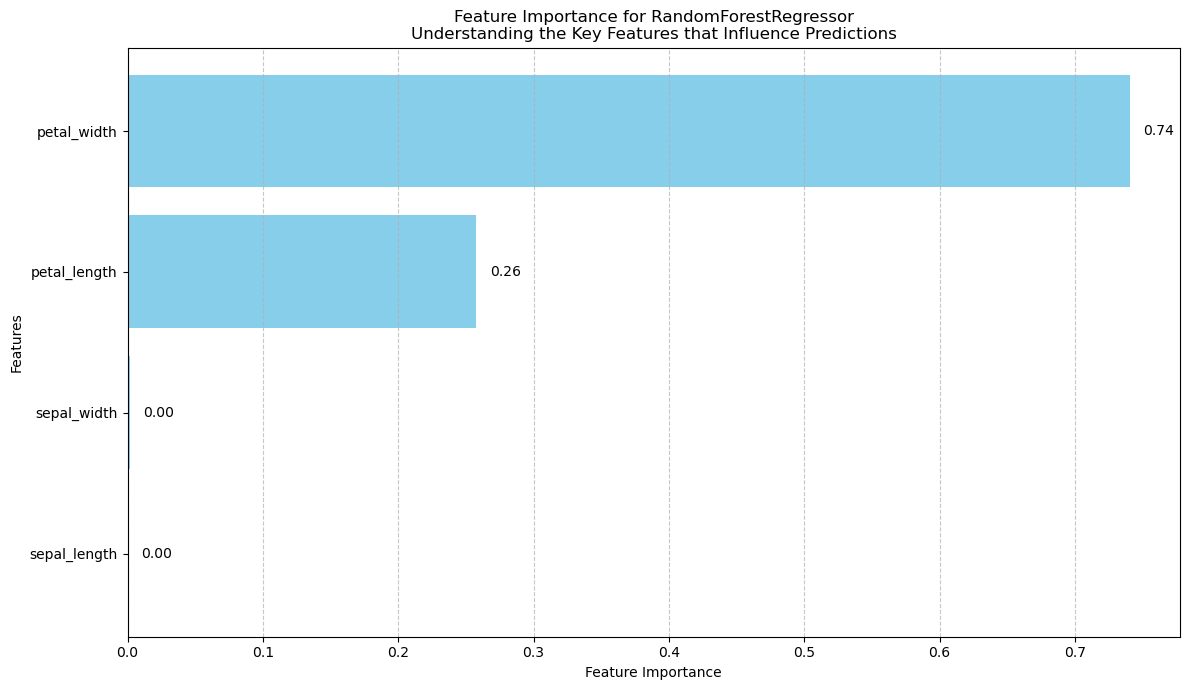

In [83]:
best_model = grid_search.best_estimator_.named_steps['model']
feature_importances = best_model.feature_importances_
features_list = features

feature_importance_df = pd.DataFrame({
    'Feature': features_list,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,7))
bars = plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for RandomForestRegressor\nUnderstanding the Key Features that Influence Predictions')
plt.gca().invert_yaxis()

for bar in bars:
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center', fontsize=10, color='black')
    
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [84]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)

y_pred = best_model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R-squared on test set: {r2:.2f}")
print(f"Mean Absolute Error on test set: {mae:.2f}")

R-squared on test set: 1.00
Mean Absolute Error on test set: 0.01


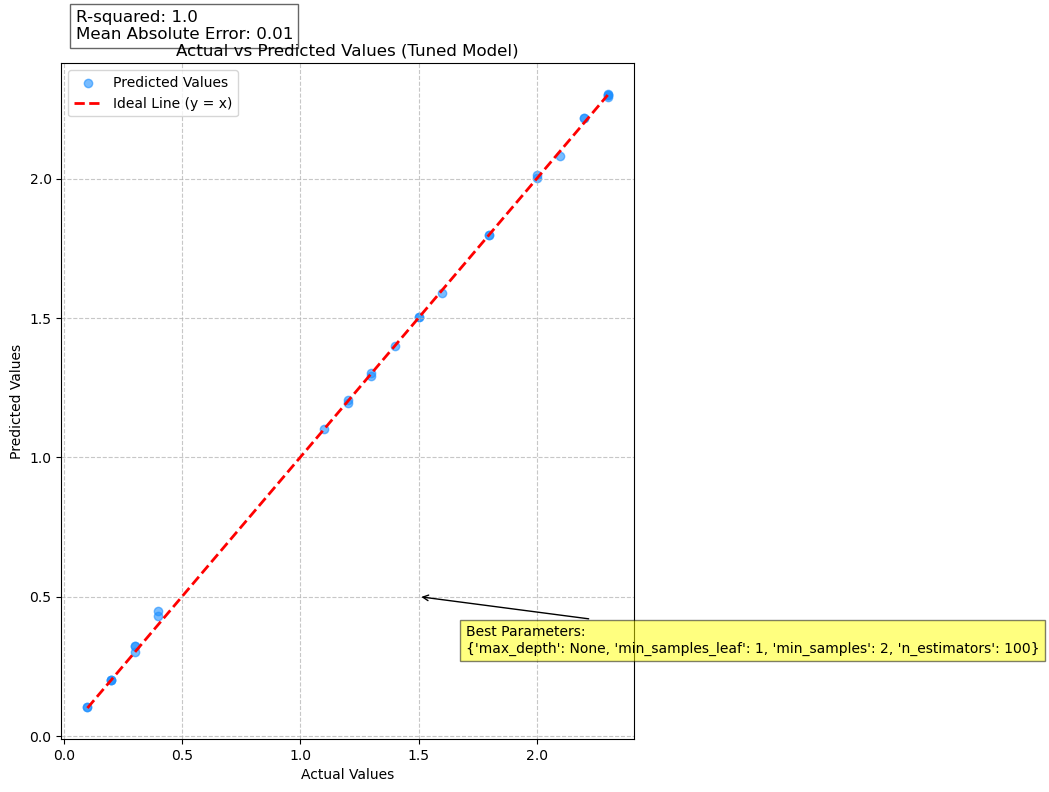

In [85]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, predictions, color= 'dodgerblue', alpha=0.6, label='Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Ideal Line (y = x)')

r_squared = 1.00
mae = 0.01
plt.text(0.05, 2.5, f'R-squared: {r_squared:.2}\nMean Absolute Error: {mae:.2f}', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))

plt.title('Actual vs Predicted Values (Tuned Model)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)

best_params={'max_depth': None, 'min_samples_leaf': 1, 'min_samples':2, 'n_estimators': 100}
plt.annotate(f"Best Parameters:\n{best_params}", xy=(1.5, 0.5), xytext=(1.7, 0.3),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            bbox=dict(facecolor='yellow', alpha=0.5), fontsize=10)

plt.tight_layout()
plt.show()

In [89]:
from sklearn. metrics import mean_squared_error, mean_absolute_percentage_error
predictions = grid_search.best_estimator_.predict(x_test)
rmse=np.sqrt(mean_squared_error(y_test, predictions))
print(f"Root Mean Squared Error on test set: {rmse:.2f}")
mape = mean_absolute_percentage_error(y_test, predictions)
print(f"Mean Absolute Percentage Error on test set: {mape:.2%}")


Root Mean Squared Error on test set: 0.02
Mean Absolute Percentage Error on test set: 1.62%


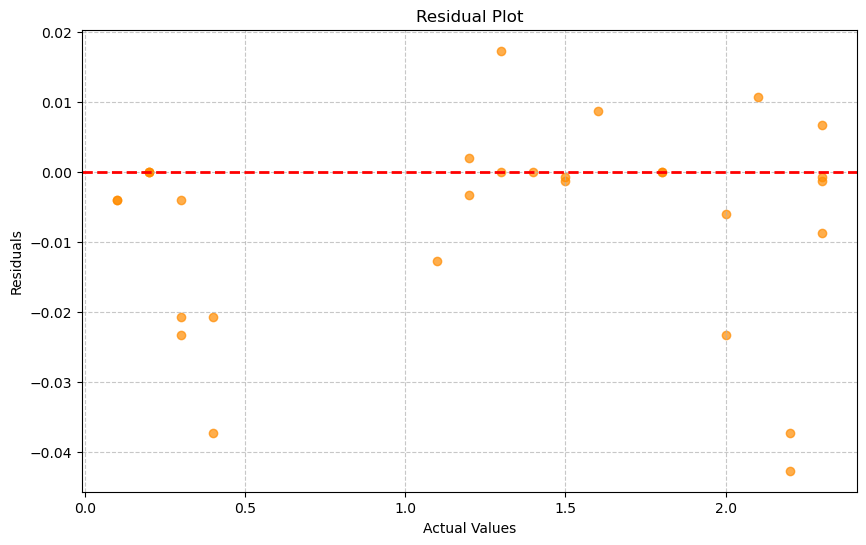

In [91]:
residuals = y_test - predictions
plt.figure(figsize=(10,6))
plt.scatter(y_test, residuals, color='darkorange', alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [92]:
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)
mape = 100*(sum(abs((y_test - predictions) / y_test)) / len(y_test))
r2 = r2_score(y_test, predictions)

print("Evaluation Metrics Summary:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")
print(f"R-squared: {r2:.2f}")


Evaluation Metrics Summary:
Root Mean Squared Error (RMSE): 0.02
Mean Absolute Percentage Error (MAPE): 1.62%
R-squared: 1.00


D:\Anaconda\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [93]:
import joblib

In [94]:
joblib.dump(pipeline, 'tuned_model_pipeline.pkl')
print("Model saved successfully as 'tuned_model_pipeline.pkl'")

Model saved successfully as 'tuned_model_pipeline.pkl'


In [96]:
loaded_pipeline = joblib.load('tuned_model_pipeline.pkl')
new_data = np.array([[5.1, 3.5, 1.4, 0.2]])
new_data_df = pd.DataFrame(new_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

predicted_value = loaded_pipeline.predict(new_data_df)
print(f"Predicted value for new data: {predicted_value[0]:.2f}")


Predicted value for new data: 0.20


# 6. GUI for Model Prediction:

In [97]:
!pip install ipywidgets

In [98]:
model = joblib.load('tuned_model_pipeline.pkl')

In [99]:
import ipywidgets as widgets
from IPython.display import display, clear_output


In [102]:
sepal_length_widget = widgets.FloatText(description='Sepal Length:')
sepal_width_widget = widgets.FloatText(description='Sepal Width:')
petal_length_widget = widgets.FloatText(description='Petal Length:')
petal_width_widget = widgets.FloatText(description='Petal Width:')

predict_button = widgets.Button(description="Predict")
display(sepal_length_widget, sepal_width_widget, petal_length_widget, petal_width_widget, predict_button)

FloatText(value=0.0, description='Sepal Length:')

FloatText(value=0.0, description='Sepal Width:')

FloatText(value=0.0, description='Petal Length:')

FloatText(value=0.0, description='Petal Width:')

Button(description='Predict', style=ButtonStyle())

In [104]:
model = joblib.load('tuned_model_pipeline.pkl')

sepal_length_widget = widgets.FloatText(description='Sepal Length:', value=5.1, style={'description_width':'initial'})
sepal_width_widget = widgets.FloatText(description='Sepal Width:',value=3.5, style={'description_width':'initial'})
petal_length_widget = widgets.FloatText(description='Petal Length:', value=1.4, style={'description_width':'initial'})
petal_width_widget = widgets.FloatText(description='Petal Width:',value=0.2, style={'description_width':'initial'})

predict_button = widgets.Button(description="Predict", button_style='success')
output_label = widgets.HTML("<b>Predicted Value:</b> -")

chart_output = widgets.Output()

def on_predict_button_clicked(b):
    sepal_length = sepal_length_widget.value
    sepal_width = sepal_width_widget.value
    petal_length = petal_length_widget.value
    petal_width = petal_width_widget.value
    
    input_features = [sepal_length, sepal_width, petal_length, petal_width]
    
    try:
        prediction = model.predict([input_features])
        output_label.value = f"<b>Predicted Value:</b> {prediction[0]:.2f}"
    except Exception as e:
        output_label.value = f"<b>Error:</b> {str(e)}"
        
    with chart_output:
        chart_output.clear_output(wait=True)
        labels = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
        values = [sepal_length, sepal_width, petal_length, petal_width]
        colors = ['skyblue', 'lightgreen', 'salmon', 'orange']
        plt.figure(figsize=(8, 4))
        plt.bar(labels, values, color=colors)
        plt.title('Flower Characteristics')
        plt.ylabel('Measurement (cm)')
        plt.ylim(0, max(values) + 1)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()
        
predict_button.on_click(on_predict_button_clicked)
display(sepal_length_widget, sepal_width_widget, petal_length_widget, petal_width_widget, predict_button, output_label, chart_output)

FloatText(value=5.1, description='Sepal Length:', style=DescriptionStyle(description_width='initial'))

FloatText(value=3.5, description='Sepal Width:', style=DescriptionStyle(description_width='initial'))

FloatText(value=1.4, description='Petal Length:', style=DescriptionStyle(description_width='initial'))

FloatText(value=0.2, description='Petal Width:', style=DescriptionStyle(description_width='initial'))

Button(button_style='success', description='Predict', style=ButtonStyle())

HTML(value='<b>Predicted Value:</b> -')

Output()

# NOTE:
I wanted to inform you that, while I intended to deploy the machine learning model of prediction using Flask as part of the demonstration, I encountered technical limitations with my current laptop that prevent Flask from running properly. Despite several troubleshooting attempts, the system’s compatibility issues persist.